<a href="https://colab.research.google.com/github/GithubofRuZhang/Algorithm-Robust-Quadratic-Programming-for-Price-Optimization/blob/main/Robust_Quadratic_Programming_for_Price_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ \begin{array}{l}\qquad g(x, \gamma):=v(x)^{\top}\left(\hat{Q}+\lambda \frac{\gamma M_{1}+M_{2} / \gamma}{2}\right) v(x) . \\ \text { where } \\ \qquad M_{1}:=L_{1}^{\top} L_{1}, \quad M_{2}:=L_{2}^{\top} L_{2} .\end{array} $

Define a function $ h:(0, \infty) \rightarrow \mathbf{R} $ by
$$
h(\gamma):=\min _{x \in \mathcal{X}} g(x, \gamma)
$$

Algorithm 1 Golden Section Search

Require: $ \hat{Q}, L_{1}, L_{2}, \lambda, \alpha, \beta, \delta $

Initialize $ a=\alpha, b=\beta, r=(\sqrt{5}-1) / 2 $

while $ |a-b| \geq \delta $ do

$ c \leftarrow b-r *(b-a), d \leftarrow a+r *(b-a) $

$ b \leftarrow d $ if $ h(c)<h(d) $, and $ a \leftarrow c $ otherwise.
end while

Output $ \tilde{x}:= oracle(x, \tilde{\gamma})=\arg \min _{x \in \mathcal{X}} g(x, \tilde{\gamma}) $ where $ \tilde{\gamma}=(a+b) / 2 $.

In [ ]:
import numpy as np

# Assume parameters and functions
# Here are just examples, the actual implementation needs to be defined based on the specific parameters and constraints of the problem

# Example parameters
M = 3  # Assume there are 3 products, can be adjusted as needed
Q_hat = np.random.rand(M, M)  # Assumed Q_hat
L1 = np.random.rand(M, M)  # Assumed L1
L2 = np.random.rand(M, M)  # Assumed L2
lambda_ = 1  # Assumed lambda
alpha = 0.1  # Initial lower bound of the search interval
beta = 2  # Initial upper bound of the search interval
delta = 0.001  # Accuracy requirement

# Define the g(x, gamma) function
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    return x.T @ term @ x

# Define the h(gamma) function, here simplified to use a fixed x value
def h(gamma):
    x = np.array([1] * M)  # Assumed x value, in reality, it should be the solution to the optimization problem
    return g(x, gamma)

# Golden section search algorithm
def golden_section_search(alpha, beta, delta):
    r = (np.sqrt(5) - 1) / 2
    a, b = alpha, beta

    while abs(b - a) >= delta:
        c = b - r * (b - a)
        d = a + r * (b - a)
        if h(c) < h(d):
            b = d
        else:
            a = c

    return (a + b) / 2

# Execute the algorithm
gamma_tilde = golden_section_search(alpha, beta, delta)
gamma_tilde


1.1174273486697541

In [ ]:
import numpy as np

# 假设参数和函数
# 这里仅为示例，具体实现需要根据问题的实际参数和约束来定义

# 示例参数
M = 3  # 假设有3个产品，可以根据需要调整
Q_hat = np.random.rand(M, M)# 假设的 Q_hat
L1 = np.random.rand(M, M) # 假设的 L1
L2 = np.random.rand(M, M)  # 假设的 L2
lambda_ = 1  # 假设的 lambda
alpha = 0.1  # 初始搜索区间下限
beta = 2  # 初始搜索区间上限
delta = 0.001  # 精度要求

# 定义 g(x, gamma) 函数
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    return x.T @ term @ x

# 定义 h(gamma) 函数，这里简化为使用固定的 x 值
def h(gamma):
    x = np.array([1] * M)  # 假设的 x 值，实际情况中应该是优化问题的解
    return g(x, gamma)

# 黄金分割搜索算法
def golden_section_search(alpha, beta, delta):
    r = (np.sqrt(5) - 1) / 2
    a, b = alpha, beta

    while abs(b - a) >= delta:
        c = b - r * (b - a)
        d = a + r * (b - a)
        if h(c) < h(d):
            b = d
        else:
            a = c

    return (a + b) / 2

# 执行算法
gamma_tilde = golden_section_search(alpha, beta, delta)
gamma_tilde


0.6407877624044351

In [ ]:
# Update the algorithm to support arbitrary dimensions of x
# Assume parameters and functions are updated
M = 3  # Assume there are 3 products, can be adjusted as needed
Q_hat = np.random.rand(M, M)  # Assumed Q_hat
L1 = np.random.rand(M, M)  # Assumed L1
L2 = np.random.rand(M, M)  # Assumed L2
lambda_ = 1  # Assumed lambda
alpha = 0.1  # Initial lower bound of the search interval
beta = 2  # Initial upper bound of the search interval
delta = 0.001  # Accuracy requirement
x_options = np.array([0.6, 0.7, 0.8, 0.9, 1.0])  # Simplified x choices

x_options = np.array([0.6, 0.7, 0.8, 0.9, 1.0])  # Simplified x choices

# Update the Oracle algorithm to support M-dimensional x
def oracle(gamma, M, x_options):
    min_val = np.inf
    x_opt = None

    # Generate all possible combinations of x
    X = np.array(np.meshgrid(*[x_options for _ in range(M)])).T.reshape(-1, M)

    # Iterate over all combinations of x
    for x in X:
        val = g(x, gamma)
        if val < min_val:
            min_val = val
            x_opt = x

    return x_opt

# Execute the golden section search using the updated Oracle algorithm
gamma_tilde = golden_section_search(alpha, beta, delta)
x_tilde = oracle(gamma_tilde, M, x_options)

gamma_tilde, x_tilde


(1.218270938964774, array([0.6, 0.6, 0.6]))

In [ ]:
# 更新算法以支持任意维度的x
# 假设参数和函数更新
M = 3  # 假设有3个产品，可以根据需要调整
Q_hat = np.random.rand(M, M)# 假设的 Q_hat
L1 = np.random.rand(M, M) # 假设的 L1
L2 = np.random.rand(M, M)  # 假设的 L2
lambda_ = 1  # 假设的 lambda
alpha = 0.1  # 初始搜索区间下限
beta = 2  # 初始搜索区间上限
delta = 0.001  # 精度要求
x_options = np.array([0.6, 0.7, 0.8, 0.9, 1.0])  # 简化的 x 选择

x_options = np.array([0.6, 0.7, 0.8, 0.9, 1.0])  # 简化的 x 选择

# 更新 Oracle 算法以支持 M 维 x
def oracle(gamma, M, x_options):
    min_val = np.inf
    x_opt = None

    # 生成所有可能的x组合
    X = np.array(np.meshgrid(*[x_options for _ in range(M)])).T.reshape(-1, M)

    # 遍历所有x组合
    for x in X:
        val = g(x, gamma)
        if val < min_val:
            min_val = val
            x_opt = x

    return x_opt

# 使用更新的 Oracle 算法执行黄金分割搜索
gamma_tilde = golden_section_search(alpha, beta, delta)
x_tilde = oracle(gamma_tilde, M, x_options)

gamma_tilde, x_tilde


(0.7817463680623973, array([0.6, 0.6, 0.6]))

In [ ]:
import numpy as np

# Updated parameter definitions
# Define assumed parameters
M = 3  # Dimension
Q_hat = np.random.rand(M, M)  # Assumed Q_hat
L1 = np.random.rand(M, M)  # Assumed L1
L2 = np.random.rand(M, M)  # Assumed L2
lambda_ = 1  # Assumed lambda
alpha = 0.1
beta = 2
delta = 0.001

# Redefine g(x, gamma) to match the updated parameters
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    # print(M1)
    # print(M2)
    # print(term)
    # print(x)
    return x.T @ term @ x

# Other functions remain unchanged

# Execute golden section search and use the Oracle algorithm
gamma_tilde = golden_section_search(alpha, beta, delta)
x_tilde = oracle(gamma_tilde, M, x_options)

gamma_tilde, x_tilde


(1.0261312559819529, array([0.6, 0.6, 0.6]))

In [ ]:
import numpy as np

# 更新的参数定义
# 定义假设的参数
M = 3  # 维度
Q_hat = np.random.rand(M, M)# 假设的 Q_hat
L1 = np.random.rand(M, M) # 假设的 L1
L2 = np.random.rand(M, M)  # 假设的 L2
lambda_ = 1  # 假设的 lambda
lambda_ = 1
alpha = 0.1
beta = 2
delta = 0.001


# 重新定义g(x, gamma)以匹配更新的参数
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    # print(M1)
    # print(M2)
    # print(term)
    # print(x)
    return x.T @ term @ x

# 其他函数保持不变

# 执行黄金分割搜索并使用Oracle算法
gamma_tilde = golden_section_search(alpha, beta, delta)
x_tilde = oracle(gamma_tilde, M, x_options)

gamma_tilde, x_tilde


(1.5760360673325113, array([0.6, 0.6, 0.6]))

To solve the optimization problem over a continuous interval for the given function $ g(x, \gamma) $, $ \tilde{x}:=\arg \min _{x \in \mathcal{X}} g(x, \tilde{\gamma}) $, we can use numerical optimization methods. For this problem, a simple yet effective approach is to use gradient descent, although it requires computing the gradient of $ g(x, \gamma) $ with respect to $ x $.

Let $ x $ be an $ M $-dimensional vector, and assume the gradients of $ g(x, \gamma) $ with respect to each element $ x_{i} $ can be computed. In practice, if $ g(x, \gamma) $ is a smooth function, we can obtain these gradients by differentiation.

### Simplified Gradient Descent Algorithm
Gradient descent is an iterative algorithm that seeks the minimum value by updating variables in the direction of the negative gradient of the objective function at each step. For $ g(x, \gamma) $, the update formula can be written as:
$$
x^{(k+1)}=x^{(k)}-\alpha \nabla_{x} g\left(x^{(k)}, \gamma\right)
$$

where $ x^{(k)} $ is the value of $ x $ at step $ k $, $ \alpha $ is the learning rate, a small positive number, and $ \nabla_{x} g\left(x^{(k)}, \gamma\right) $ is the gradient of $ g(x, \gamma) $ with respect to $ x $ at $ x^{(k)} $.

### Algorithm Steps
1. **Initialization**: Choose an initial point $ x^{(0)} $, set the learning rate $ \alpha $, and tolerance $ \epsilon $.
2. **Iterative Update**:
   - Compute the gradient: $ \nabla_{x} g\left(x^{(k)}, \tilde{\gamma}\right) $.
   - Update $ x: x^{(k+1)}=x^{(k)}-\alpha \nabla_{x} g\left(x^{(k)}, \tilde{\gamma}\right) $.
3. **Termination Condition**: Stop iteration when $ \left\|x^{(k+1)}-x^{(k)}\right\|<\epsilon $.

### Example Implementation
Below is a simplified example demonstrating how to implement this process. Please note that we need to compute the gradient based on the specific form of $ g(x, \gamma) $.


要解决给定的 $ g(x, \gamma) $ 函数在连续区间上的优化问题 $ \tilde{x}:=\arg \min _{x \in \mathcal{X}} g(x, \tilde{\gamma}) $ ，我们可以使用数值优化方法。对于这个问题，一个简单但有效的方法是使用梯度下降法，尽管需要计算 $ g(x, \gamma) $ 关于 $ x $ 的梯度。

假设 $ x $ 是一个 $ M $ 维向量，并且 $ g(x, \gamma) $ 对每个元素 $ x_{i} $ 的梯度可以计算。在实际情况中，如果 $ g(x, \gamma) $ 是一个光滑函数，我们可以通过求导来获得这些梯度。

简化的梯度下降法
梯度下降法是一种迭代算法，通过在每一步中沿着目标函数的负梯度方向更新变量来寻找最小值。对于 $ g(x, \gamma) $ ，更新公式可以写为:
$$
x^{(k+1)}=x^{(k)}-\alpha \nabla_{x} g\left(x^{(k)}, \gamma\right)
$$

其中， $ x^{(k)} $ 是第 $ k $ 步的 $ x $ 值， $ \alpha $ 是学习率，一个小的正数， $ \nabla_{x} g\left(x^{(k)}, \gamma\right) $ 是 $ g(x, \gamma) $在 $ x^{(k)} $ 处对 $ x $ 的梯度。

算法步骤
1. 初始化: 选择一个初始点 $ x^{(0)} $ ，设置学习率 $ \alpha $ 和容忍度 $ \epsilon $ 。
2. 迭代更新:
- 计算梯度: $ \nabla_{x} g\left(x^{(k)}, \tilde{\gamma}\right) $ 。
- 更新 $ x: x^{(k+1)}=x^{(k)}-\alpha \nabla_{x} g\left(x^{(k)}, \tilde{\gamma}\right) $ 。
3. 终止条件: 当 $ \left\|x^{(k+1)}-x^{(k)}\right\|<\epsilon $ 时停止迭代。

示例实现
下面是一个简化的示例，展示如何实现这一过程。请注意，我们需要根据 $ g(x, \gamma) $ 的具体形式来计算梯度。

In [ ]:
def gradient_g(x, gamma):
    # Gradient calculation based on the specific form of g(x, gamma)
    # Example gradient calculation, for reference only
    grad = 2 * (Q_hat + lambda_ * (gamma * L1.T @ L1 + (L2.T @ L2) / gamma) / 2) @ x
    return grad

def gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init
    for i in range(max_iter):
        grad = gradient_g(x, gamma)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x

# Example usage

# Generate random numbers within a specified range, for example, within the [0.6, 1.0] interval
x_init = np.random.rand(M) * 0.2 + 0.8
gamma = gamma_tilde  # Previously computed gamma_tilde
alpha = 0.0000001  # Learning rate
epsilon = 1e-3  # Tolerance

x_opt = gradient_descent(x_init, gamma, alpha, epsilon)
x_opt


array([0.80082512, 0.97349224, 0.80629536])

In [ ]:
def gradient_g(x, gamma):
    # 这里需要根据g(x, gamma)的具体形式来计算梯度
    # 示例梯度计算，仅供参考
    grad = 2 * (Q_hat + lambda_ * (gamma * L1.T @ L1 + (L2.T @ L2) / gamma) / 2) @ x
    return grad

def gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init
    for i in range(max_iter):
        grad = gradient_g(x, gamma)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x

# 使用示例

# 生成在指定范围内的随机数，例如在[0.6, 1.0]区间内
x_init = np.random.rand(M) * 0.2 + 0.8
gamma = gamma_tilde  # 之前计算得到的gamma_tilde
alpha = 0.0000001  # 学习率
epsilon = 1e-3  # 容忍度

x_opt = gradient_descent(x_init, gamma, alpha, epsilon)
x_opt


array([0.92965874, 0.99867665, 0.98175512])

In [ ]:
# Define the gradient computation function
def gradient_g(x, gamma):
    # Compute the gradient based on the actual expression of g(x, gamma)
    # Here, the assumed parameters from the example are used for calculation
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    grad = 2 * (term.T + term) @ x
    return grad

# Define the gradient descent method
def gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init
    for i in range(max_iter):
        grad = gradient_g(x, gamma)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x

# Initialize parameters
x_init = np.random.rand(M) * 60 + 100  # Random initialization for x
print(x_init)
gamma = 0.9997  # Use the previously computed gamma_tilde
alpha = 0.0000001  # Learning rate
epsilon = 1e-6  # Tolerance

# Execute gradient descent algorithm to find the optimal x
x_opt = gradient_descent(x_init, gamma, alpha, epsilon)

x_opt


[114.77332052 110.53089976 121.8014363 ]


array([114.61645384, 110.35496652, 121.63487912])

In [ ]:
# 定义梯度计算函数
def gradient_g(x, gamma):
    # 根据g(x, gamma)的实际表达式计算梯度
    # 这里使用示例中的假设参数进行计算
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    grad = 2 * (term.T+term) @ x
    return grad

# 定义梯度下降法
def gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init
    for i in range(max_iter):
        grad = gradient_g(x, gamma)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x

# 初始化参数
x_init = np.random.rand(M)*60+100  # 随机初始化x
print(x_init)
gamma = 0.9997  # 使用之前计算得到的gamma_tilde
alpha = 0.0000001  # 学习率
epsilon = 1e-6  # 容忍度

# 执行梯度下降算法找到最优x
x_opt = gradient_descent(x_init, gamma, alpha, epsilon)

x_opt


[120.5522323  133.76145453 115.88353019]


array([120.36190874, 133.60610404, 115.71042473])

To adapt the gradient descent algorithm to use adaptive learning rates, we can employ techniques from popular optimization algorithms such as Adam (Adaptive Moment Estimation) or RMSprop (Root Mean Square Propagation). These algorithms adjust the learning rate for each parameter to improve convergence speed and stability, especially in complex optimization problems.

Here, I will demonstrate how to modify the original gradient descent algorithm to use a simplified version of the Adam algorithm. The Adam algorithm combines the concepts of momentum and adaptive learning rates, adjusting the learning rate for each parameter independently.

要将梯度下降算法改造为使用自适应学习率，我们可以采用一些流行的优化算法中的技术，如 Adam（Adaptive Moment Estimation）或 RMSprop（Root Mean Square Propagation）。这些算法通过调整每个参数的学习率来改善收敛速度和稳定性，特别是在复杂的优化问题中。

这里，我将展示如何将原先的梯度下降算法修改为使用一个简化版本的 Adam 算法。Adam 算法结合了动量（Momentum）和自适应学习率的概念，对于每个参数独立地调整学习率。

This 'adam_gradient_descent' function takes the same parameters: initial 'x', 'gamma', learning rate 'alpha', tolerance 'epsilon', and maximum number of iterations 'max_iter'. It utilizes the core concepts of the Adam algorithm but omits some complexities for the sake of clarity in the example.
- $ m^{\prime} $ and $ v^{\prime} $ store the first (mean) and second (uncentered variance) moment estimates regarding the gradients, respectively.
- 'beta1' and 'beta2' control the exponential decay rates of these moment estimates, which are specific hyperparameters of the Adam algorithm.
- '$ m_{\text{hat}} $' and '$ v_{\text{hat}} $' are bias-corrected estimates of '$ m $' and '$ v $', used to adjust these estimates in the early stages of the algorithm.


这个 'adam_gradient_descent' 函数接收相同的参数：初始 ' $ x $ '、'gamma 、学习率 'alpha'、容忍度 'epsilon “以及最大迭代次数 'max_iter'。它使用 Adam 算法的核心概念，但省略了一些复杂性以保持示例的清晰性。
- $ m^{\prime} $ 和 $ v^{\prime} $ 分别存储关于梯度的一阶 (平均) 和二阶 (未中心化的方差) 矩估计。
- 'beta1 '和 'beta2'控制这些矩估计的指数衰减率, 这是 Adam 算法特有的超参数。
- ' $ m_{-} $hat' 和 ' $ v $ _ hat' 是对 ' $ m $ ' 和 ' $ v $ ' 的偏差校正，用于在算法的早期阶段调整这些估计。

In [ ]:
import numpy as np

# Define assumed parameters
M = 10  # Dimensionality, representing the problem size or the number of variables
Q_hat = np.random.rand(M, M)  # Randomly generate assumed Q_hat, simulating unknown parameter matrix in real scenarios
L1 = np.random.rand(M, M)  # Randomly generate assumed L1, representing some linear transformation or constraint
L2 = np.random.rand(M, M)  # Randomly generate assumed L2, also representing some linear transformation or constraint
lambda_ = 1  # Assumed lambda, used to adjust the strength of the regularization term

# Define the gradient of the g(x, gamma) function
def gradient_g(x, gamma):
    M1 = L1.T @ L1  # Compute the autocorrelation matrix of L1
    M2 = L2.T @ L2  # Compute the autocorrelation matrix of L2
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2  # Combine all terms to form the coefficient matrix of the objective function
    grad = 2 * (term.T + term) @ x  # Compute the gradient of the objective function with respect to x
    return grad

# Define the Adam gradient descent algorithm
def adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init  # Initialize x
    m = np.zeros(x.shape)  # Initialize first moment estimate to 0
    v = np.zeros(x.shape)  # Initialize second moment estimate to 0
    beta1 = 0.9  # Decay rate for the first moment, used for the first moment estimate
    beta2 = 0.999  # Decay rate for the second moment, used for the second moment estimate
    eta = alpha  # Learning rate
    delta = 1e-8  # Small constant to avoid division by zero

    for i in range(1, max_iter + 1):
        grad = gradient_g(x, gamma)  # Compute the gradient of x

        # Update first and second moment estimates
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Bias correction for moment estimates
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        # Update parameter x
        x_new = x - eta * m_hat / (np.sqrt(v_hat) + delta)

        # Check for convergence
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x

# Initialize parameters and execute the algorithm
x_init = np.random.rand(M) * 0.4 + 0.6  # Random initialization for x, ensuring its initial values are within [0.6, 1.0]
gamma = 0.9997  # Given gamma value
alpha = 0.0001  # Learning rate, a small value to ensure stable convergence
epsilon = 1e-6  # Convergence threshold, stop iteration when the difference between consecutive iterations is less than this value
max_iter = 1000  # Maximum number of iterations

# Optimize x using the Adam algorithm
x_opt_adam = adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter)

x_opt_adam


array([0.55478085, 0.51890734, 0.51502009, 0.6839514 , 0.7875041 ,
       0.50809128, 0.7090022 , 0.50895391, 0.65790766, 0.65105125])

In [ ]:
import numpy as np

# 定义假设的参数
M = 10  # 维度，表示问题的规模或变量的数量
Q_hat = np.random.rand(M, M)  # 随机生成假设的 Q_hat，模拟真实情况下未知的参数矩阵
L1 = np.random.rand(M, M)  # 随机生成假设的 L1，代表某种线性变换或约束
L2 = np.random.rand(M, M)  # 随机生成假设的 L2，同样代表某种线性变换或约束
lambda_ = 1  # 假设的 lambda，用于调节正则化项的强度

# 定义 g(x, gamma) 函数的梯度
def gradient_g(x, gamma):
    M1 = L1.T @ L1  # 计算L1的自相关矩阵
    M2 = L2.T @ L2  # 计算L2的自相关矩阵
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2  # 综合所有项，形成目标函数的系数矩阵
    grad = 2 * (term.T + term) @ x  # 计算目标函数关于x的梯度
    return grad

# 定义 Adam 梯度下降算法
def adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init  # 初始化x
    m = np.zeros(x.shape)  # 初始化一阶动量估计为0
    v = np.zeros(x.shape)  # 初始化二阶动量估计为0
    beta1 = 0.9  # 动量衰减率，用于一阶估计
    beta2 = 0.999  # 动量衰减率，用于二阶估计
    eta = alpha  # 学习率
    delta = 1e-8  # 用于避免除以零的小常数

    for i in range(1, max_iter + 1):
        grad = gradient_g(x, gamma)  # 计算当前x的梯度

        # 更新一阶和二阶动量估计
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # 对动量估计进行偏差校正
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        # 更新参数x
        x_new = x - eta * m_hat / (np.sqrt(v_hat) + delta)

        # 检查是否满足停止准则
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x

# 初始化参数并执行算法
x_init = np.random.rand(M) * 0.4 + 0.6  # 随机初始化x，确保其初始值在[0.6, 1.0]之间
gamma = 0.9997  # 给定的gamma值
alpha = 0.0001  # 学习率，较小值以确保稳定收敛
epsilon = 1e-6  # 收敛阈值，当连续两次迭代的差距小于此值时停止迭代
max_iter = 1000  # 最大迭代次数

# 使用Adam算法优化x
x_opt_adam = adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter)

x_opt_adam


array([0.69488759, 0.53487061, 0.62905657, 0.86611912, 0.68665855,
       0.62447621, 0.6041907 , 0.82022914, 0.81636497, 0.75759757])

The Coordinate Descent algorithm is an iterative method used for solving optimization problems. It updates only one variable at a time while keeping all other variables fixed. In the provided algorithm, we alternate between optimizing $\gamma$ and $x$ until the stopping condition is met.

To implement this algorithm, we need to define a function for optimizing $\gamma$ and another function for optimizing $x$. Assuming we already have the expression for $g(x, \gamma)$ and the corresponding gradient calculation function.

协同下降（Coordinate Descent）算法是一种用于求解优化问题的迭代方法, 它一次只更新问题中的一个变量, 而保持其他所有变量固定。在给出的算法中, 我们交替地优化 $\gamma$ 和 $x$, 直到满足停止条件为止。

为了实现这个算法，我们需要定义一个用于优化 $\gamma$ 的函数，以及一个用于优化 $x$ 的函数。假设我们已经有了 $g(x, \gamma)$ 的表达式和相应的梯度计算函数。

初步代码，不包含实验随机生成真实分布和噪声

In [ ]:
import numpy as np

# 假设的参数和函数.
M = 10  # A_hat的行数
N = M+1  # A_hat的列数

# 随机生成A_hat
A_hat = np.random.rand(M, N)
Q_hat = np.zeros((N, N))
Q_hat[:M, :N]=A_hat
# print("Q_hat: "+str(Q_hat))
# Q_hat = np.random.rand(M, M)  # 随机生成的 Q_hat
L1 = np.random.rand(N, N)  # 随机生成的 L1
L2 = np.random.rand(N, N)  # 随机生成的 L2


lambda_ = 1  # 假设的 lambda
alpha = 0.0001  # 初始搜索区间下限
beta = 2  # 初始搜索区间上限
delta = 0.001  # 精度要求
# x_init = np.random.rand(M) * 0.4 + 0.6  # 随机初始化x，确保其初始值在[0.6, 1.0]之间

# 定义 g(x, gamma) 函数
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    # print("M1:"+str(M1))
    # print("M2:"+str(M2))
    # print("Q_hat: "+str(Q_hat))
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    return x.T @ term @ x

# 定义优化x给定gamma的函数
def optimize_x(gamma, epsilon=1e-6, max_iter=10000):
    x_init = np.random.rand(M) * 80 + 20
    v_x = np.concatenate([x_init, np.ones(N - M)])
    # print("x_init: " + str(x_init))
    # print()
    return adam_gradient_descent(v_x, gamma, alpha, epsilon, max_iter)

# 定义优化gamma给定x的函数
def optimize_gamma(x, epsilon=1e-6, max_iter=10000):
    # 根据提供的公式计算最优gamma
    numerator = np.linalg.norm(L2 @ x)
    denominator = np.linalg.norm(L1 @ x)
    return numerator / denominator if denominator != 0 else np.inf

# 定义 g(x, gamma) 函数的梯度
def gradient_g(x, gamma):
    M1 = L1.T @ L1  # 计算L1的自相关矩阵
    M2 = L2.T @ L2  # 计算L2的自相关矩阵
    # print("x:" +str(x))
    # print("M1:"+str(M1))
    # print("M2:"+str(M2))
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2  # 综合所有项，形成目标函数的系数矩阵
    grad = 2 * (term.T + term) @ x  # 计算目标函数关于x的梯度
    return grad
# 定义 Adam 梯度下降算法
def adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init  # 初始化x
    m = np.zeros(x.shape)  # 初始化一阶动量估计为0
    v = np.zeros(x.shape)  # 初始化二阶动量估计为0
    beta1 = 0.9  # 动量衰减率，用于一阶估计
    beta2 = 0.999  # 动量衰减率，用于二阶估计
    eta = alpha  # 学习率
    delta = 1e-8  # 用于避免除以零的小常数

    for i in range(1, max_iter + 1):
        grad = gradient_g(x, gamma)  # 计算当前x的梯度

        # 更新一阶和二阶动量估计
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # 对动量估计进行偏差校正
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        # 更新参数x
        x_new = x - eta * m_hat / (np.sqrt(v_hat) + delta)

        # 检查是否满足停止准则
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x

# 实现坐标下降算法
def coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0, delta, epsilon=1e-6, max_iter=1000):
    assert gamma_0 > 0, "gamma_0 must be positive"
    r = np.inf
    tilde_gamma = gamma_0
    tilde_x = optimize_x(tilde_gamma, epsilon, max_iter)
    k = 0
    while r - g(tilde_x, tilde_gamma) > delta and not np.isinf(tilde_gamma) and tilde_gamma != 0:
        r = g(tilde_x, tilde_gamma)
        # print("r - g(tilde_x, tilde_gamma): "+ str(r - g(tilde_x, tilde_gamma)))
        # print()
        tilde_x = optimize_x(tilde_gamma, epsilon, max_iter)
        # print("tilde_x:" + str(tilde_x))
        # print()
        tilde_gamma = optimize_gamma(tilde_x, epsilon, max_iter)
        # print("tilde_gamma: " + str(tilde_gamma))
        # print("-------------------------------")
        k+=1
    # print("iterarion number: " + str(k))# 打印当前迭代次数
    return tilde_x,tilde_gamma
for lambda_ in range(1, 3):
  # 调用coordinate_descent函数
  tilde_x,tilde_gamma = coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0=0.9997, delta=1e-6)
  tilde_g = g(tilde_x, tilde_gamma)
  v_x=np.concatenate([tilde_x[:M], np.ones(N - M)])
  demand = A_hat @  v_x
  revenue = tilde_x[:M] @ demand

  print("Optimized x:", tilde_x[:M])
  print("Optimized gamma:",tilde_gamma)
  print("Demand:",demand )
  print("Optimized revenue:",revenue)
  print("---------------------------------------------")


Optimized x: [56.56581649 37.47452217 73.06478924 51.94427653 85.31411748 70.95652406
 54.14285943 98.90208281 83.8598239  75.97257732]
Optimized gamma: 1.0155163817385253
Demand: [415.14803083 309.66667082 389.70916117 236.57393298 409.12970154
 468.56832009 221.09486417 311.41923521 448.52184635 399.1583486 ]
Optimized revenue: 254711.766761954
---------------------------------------------
Optimized x: [69.52147706 46.06217469 87.49935515 26.55370355 68.85611759 27.03581431
 72.61631851 72.97554412 51.5359844  56.92218272]
Optimized gamma: 0.9835573330340194
Demand: [351.13217084 272.79623297 326.66074698 227.73261191 332.95563968
 420.03112113 200.16075837 271.9304883  375.11235603 361.08524284]
Optimized revenue: 180153.23737548458
---------------------------------------------


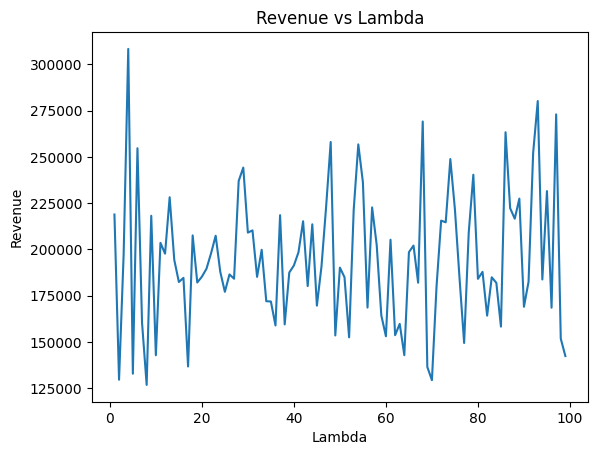

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lambdaMax=100
# 创建空列表来存储不同 lambda 下的 revenue
revenues = []

for lambda_ in range(1, lambdaMax):
    # 调用coordinate_descent函数
    tilde_x, tilde_gamma = coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0=0.9997, delta=1e-6)
    tilde_g = g(tilde_x, tilde_gamma)
    v_x = np.concatenate([tilde_x[:M], np.ones(N - M)])
    demand = A_hat @ v_x
    revenue = tilde_x[:M] @ demand

    # 将当前 lambda 下的 revenue 加入列表
    revenues.append(revenue)

    # print("Optimized x:", tilde_x[:M])
    # print("Optimized gamma:", tilde_gamma)
    # print("Demand:", demand)
    # print("Optimized revenue:", revenue)
    # print("---------------------------------------------")

# 绘制折线图
plt.plot(range(1, lambdaMax), revenues)
plt.xlabel('Lambda')
plt.ylabel('Revenue')
plt.title('Revenue vs Lambda')
plt.show()

随机试验，先生成真实随机矩阵，加上噪声作为估计

In [ ]:
import numpy as np

# 假设的参数和函数.
M = 10  # A_hat的行数
N = M+1  # A_hat的列数

# 随机生成A_hat
A_hat = np.random.rand(M, N)
Q_hat = np.zeros((N, N))
Q_hat[:M, :N]=A_hat
# print("Q_hat: "+str(Q_hat))
# Q_hat = np.random.rand(M, M)  # 随机生成的 Q_hat
L1 = np.random.rand(N, N)  # 随机生成的 L1
L2 = np.random.rand(N, N)  # 随机生成的 L2
x_init = np.random.rand(M) * 80 + 20

lambda_ = 1  # 假设的 lambda
alpha = 0.0001  # 初始搜索区间下限
beta = 2  # 初始搜索区间上限
delta = 0.000001  # 精度要求
# x_init = np.random.rand(M) * 0.4 + 0.6  # 随机初始化x，确保其初始值在[0.6, 1.0]之间

# 定义 g(x, gamma) 函数
def g(x, gamma):
    M1 = L1.T @ L1
    M2 = L2.T @ L2
    # print("M1:"+str(M1))
    # print("M2:"+str(M2))
    # print("Q_hat: "+str(Q_hat))
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2
    return x.T @ term @ x

# 定义优化x给定gamma的函数
def optimize_x(gamma, epsilon=1e-6, max_iter=10000):
    v_x = np.concatenate([x_init, np.ones(N - M)])
    # print("x_init: " + str(x_init))
    # print()
    return adam_gradient_descent(v_x, gamma, alpha, epsilon, max_iter)

# 定义优化gamma给定x的函数
def optimize_gamma(x, epsilon=1e-6, max_iter=10000):
    # 根据提供的公式计算最优gamma
    numerator = np.linalg.norm(L2 @ x)
    denominator = np.linalg.norm(L1 @ x)
    return numerator / denominator if denominator != 0 else np.inf

# 定义 g(x, gamma) 函数的梯度
def gradient_g(x, gamma):
    M1 = L1.T @ L1  # 计算L1的自相关矩阵
    M2 = L2.T @ L2  # 计算L2的自相关矩阵
    # print("x:" +str(x))
    # print("M1:"+str(M1))
    # print("M2:"+str(M2))
    term = Q_hat + lambda_ * (gamma * M1 + M2 / gamma) / 2  # 综合所有项，形成目标函数的系数矩阵
    grad = 2 * (term.T + term) @ x  # 计算目标函数关于x的梯度
    return grad
# 定义 Adam 梯度下降算法
def adam_gradient_descent(x_init, gamma, alpha, epsilon, max_iter=1000):
    x = x_init  # 初始化x
    m = np.zeros(x.shape)  # 初始化一阶动量估计为0
    v = np.zeros(x.shape)  # 初始化二阶动量估计为0
    beta1 = 0.9  # 动量衰减率，用于一阶估计
    beta2 = 0.999  # 动量衰减率，用于二阶估计
    eta = alpha  # 学习率
    delta = 1e-8  # 用于避免除以零的小常数

    for i in range(1, max_iter + 1):
        grad = gradient_g(x, gamma)  # 计算当前x的梯度

        # 更新一阶和二阶动量估计
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # 对动量估计进行偏差校正
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        # 更新参数x
        x_new = x - eta * m_hat / (np.sqrt(v_hat) + delta)

        # 检查是否满足停止准则
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x

# 实现坐标下降算法
def coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0, delta, epsilon=1e-6, max_iter=1000):
    assert gamma_0 > 0, "gamma_0 must be positive"
    r = np.inf
    tilde_gamma = gamma_0
    tilde_x = optimize_x(tilde_gamma, epsilon, max_iter)
    k = 0
    while r - g(tilde_x, tilde_gamma) > delta and not np.isinf(tilde_gamma) and tilde_gamma != 0:
        r = g(tilde_x, tilde_gamma)
        # print("r - g(tilde_x, tilde_gamma): "+ str(r - g(tilde_x, tilde_gamma)))
        # print()
        tilde_x = optimize_x(tilde_gamma, epsilon, max_iter)
        # print("tilde_x:" + str(tilde_x))
        # print()
        tilde_gamma = optimize_gamma(tilde_x, epsilon, max_iter)
        # print("tilde_gamma: " + str(tilde_gamma))
        # print("-------------------------------")
        k+=1
    # print("iterarion number: " + str(k))# 打印当前迭代次数
    return tilde_x,tilde_gamma
for lambda_ in range(1, 3):
  # 调用coordinate_descent函数
  tilde_x,tilde_gamma = coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0=0.9997, delta=1e-6)
  tilde_g = g(tilde_x, tilde_gamma)
  v_x=np.concatenate([tilde_x[:M], np.ones(N - M)])
  demand = A_hat @  v_x
  revenue = tilde_x[:M] @ demand

  print("Optimized x:", tilde_x[:M])
  print("Optimized gamma:",tilde_gamma)
  print("Demand:",demand )
  print("Optimized revenue:",revenue)
  print("---------------------------------------------")


Optimized x: [90.70447187 28.90381559 85.76645555 78.36537557 36.3261637  38.81746935
 28.96832921 56.34135953 61.41649997 98.06482245]
Optimized gamma: 1.062615762160149
Demand: [288.25687718 314.71525971 386.88472702 312.52971758 280.66531328
 249.14926081 240.83485671 387.9424693  331.63338801 279.62241782]
Optimized revenue: 189405.41226070278
---------------------------------------------
Optimized x: [90.70447181 28.90381583 85.76645571 78.36537561 36.32616371 38.81746945
 28.96832913 56.34135955 61.41650004 98.0648225 ]
Optimized gamma: 1.062615762101197
Demand: [288.25687739 314.71525987 386.88472733 312.52971799 280.66531346
 249.14926098 240.83485698 387.94246962 331.63338826 279.62241813]
Optimized revenue: 189405.4126135775
---------------------------------------------


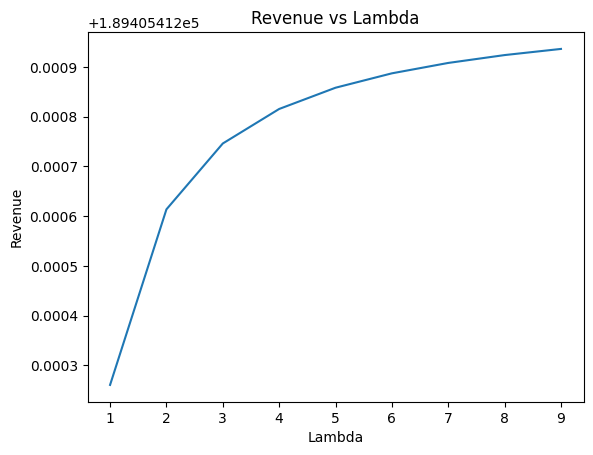

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lambdaMax=10
# 创建空列表来存储不同 lambda 下的 revenue
revenues = []

for lambda_ in range(1, lambdaMax):
    # 调用coordinate_descent函数
    tilde_x, tilde_gamma = coordinate_descent(Q_hat, L1, L2, lambda_, gamma_0=0.9997, delta=1e-6)
    tilde_g = g(tilde_x, tilde_gamma)
    v_x = np.concatenate([tilde_x[:M], np.ones(N - M)])
    demand = A_hat @ v_x
    revenue = tilde_x[:M] @ demand

    # 将当前 lambda 下的 revenue 加入列表
    revenues.append(revenue)

    # print("Optimized x:", tilde_x[:M])
    # print("Optimized gamma:", tilde_gamma)
    # print("Demand:", demand)
    # print("Optimized revenue:", revenue)
    # print("---------------------------------------------")

# 绘制折线图
plt.plot(range(1, lambdaMax), revenues)
plt.xlabel('Lambda')
plt.ylabel('Revenue')
plt.title('Revenue vs Lambda')
plt.show()

DCPError: Problem does not follow DCP rules. Specifically:
The following constraints are not DCP:
Hstack(var54, reshape(1.0, (1,), F), [ 0.32599654 -1.53571339], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.32599654 -1.53571339], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [ 0.32599654 -1.53571339], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.32599654 -1.53571339], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [0.1021679  2.09651379], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.1021679  2.09651379], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [0.1021679  2.09651379], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.1021679  2.09651379], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [-3.09927208 -1.52148606], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-3.09927208 -1.52148606], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [-3.09927208 -1.52148606], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-3.09927208 -1.52148606], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [ 0.18530275 -1.70704096], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.18530275 -1.70704096], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [ 0.18530275 -1.70704096], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.18530275 -1.70704096], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [-1.9520125   2.19742424], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-1.9520125   2.19742424], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [-1.9520125   2.19742424], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-1.9520125   2.19742424], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [-0.60093367 -0.50334531], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-0.60093367 -0.50334531], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [-0.60093367 -0.50334531], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-0.60093367 -0.50334531], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [ 0.92530563 -1.69830878], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.92530563 -1.69830878], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [ 0.92530563 -1.69830878], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [ 0.92530563 -1.69830878], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [-0.34676096  0.99642309], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-0.34676096  0.99642309], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [-0.34676096  0.99642309], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [-0.34676096  0.99642309], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [0.98511557 0.17920516], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.98511557 0.17920516], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [0.98511557 0.17920516], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.98511557 0.17920516], reshape(-var55, (1,), F))
Hstack(var54, reshape(1.0, (1,), F), [0.57624338 0.6781968 ], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.57624338 0.6781968 ], reshape(-var55, (1,), F)) <= 0.0 , because the following subexpressions are not:
|--  Hstack(var54, reshape(1.0, (1,), F), [0.57624338 0.6781968 ], reshape(1.0, (1,), F)) @ ([[-0.5038474  -0.37997064 -0.98160231 -1.88756352  0.32723988  2.88028383]
 [-0.08149362  0.42154446 -1.31430324  0.05218593  0.67027132 -0.64136199]
 [ 0.09379442 -0.88386535 -0.8580439  -0.54608951 -1.97777804  0.70625542]
 [ 0.30924099 -0.57450895  1.61146679 -0.27395204  0.40962281 -0.51136707]
 [ 0.69014424  0.16764099 -0.47588611 -0.11906035 -0.82644351  1.25302684]
 [-0.71726908 -1.03803006 -1.07534096 -0.46188489 -1.35704476 -1.5911465 ]] + (Promote(param56, (6, 6)) @ [[ 0.35525983  0.17885789  0.07280743  0.00509688 -0.2924033  -0.01802598]
 [-0.34564293 -0.76967136  0.79286414 -0.1950408  -0.64279059 -1.90082563]
 [ 1.22354784  1.56418459  1.43561673 -0.78614966  0.39227023 -0.31937699]
 [ 0.41032556  0.24114722 -1.77585553  0.47913377  1.37505086  1.33446497]
 [ 1.33348798  1.16612839  1.20387143  0.73951058 -1.8624911   1.20815674]
 [ 0.55955754 -0.63192701 -0.31602437 -1.43532804  0.93683094  1.75986299]] + [[ 0.37771372 -0.28373146 -0.69850119 -0.25798555 -1.0762108  -0.53341316]
 [-0.80676367  1.32419331 -0.41108925  0.35587128  0.70373185 -0.0927806 ]
 [-1.12321949  0.83310058 -0.29516559 -0.8207274  -0.89410443  1.12949184]
 [ 1.63738975 -0.96556654  1.75535259  0.43022769 -1.13020485 -0.75147084]
 [ 1.42997805  1.04029229 -0.28890492  0.75917508  1.5100531  -0.27861945]
 [-0.61251512 -0.09778211 -1.05408224  0.69857724 -0.91887022 -0.5774115 ]] / Promote(param56, (6, 6))) / Promote(2.0, (6, 6))) @ Hstack(var54, reshape(1.0, (1,), F), Promote(-var55, (2,)) @ [0.57624338 0.6781968 ], reshape(-var55, (1,), F))